<a href="https://colab.research.google.com/github/ahyatt7/IntroToML/blob/main/Homework%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

dataset = pd.read_csv('/content/gdrive/MyDrive/Spring 2023/Intro to ML/diabetes.csv')

dataset.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Problem 1**

(614, 8)
Accuracy: 82.468%
Precision: 76.316%
Recall: 61.702%


Text(0.5, 257.44, 'Predicted label')

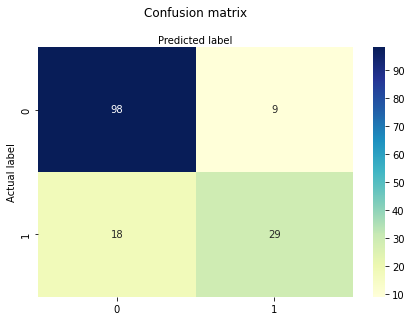

In [ ]:
X = dataset.iloc[:, :8].values
Y = dataset.iloc[:, 8].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, 
                                                    random_state=0, shuffle=True)
print(X_train.shape)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

accuracy = metrics.accuracy_score(Y_test, Y_pred)*100.0
precision = metrics.precision_score(Y_test, Y_pred)*100.0
recall = metrics.recall_score(Y_test, Y_pred)*100.0
print("Accuracy: %.3f%%" % accuracy)
print("Precision: %.3f%%" % precision)
print("Recall: %.3f%%" % recall)

cnf_matrix = confusion_matrix(Y_test, Y_pred)

class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **Problem 2**

In [ ]:
kfold = KFold(n_splits = 5,random_state=0, shuffle = True)
model = LogisticRegression(solver = 'liblinear')
results_5folds = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results_5folds.mean()*100.0, 
                                     results_5folds.std()*100.0))

kfold = KFold(n_splits = 10, random_state = 0, shuffle = True)
model = LogisticRegression(solver = 'liblinear')
results_10folds = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results_10folds.mean()*100.0, 
                                     results_10folds.std()*100.0))

print("Percent difference between 5 k-folds and standard logistic regression: %.3f%%"
 % ((results_5folds.mean()*100.0-accuracy)/accuracy))

print("Percent difference between 10 k-folds and standard logistic regression: %.3f%%"
 % ((results_10folds.mean()*100.0-accuracy)/accuracy))

Accuracy: 76.555% (3.185%)
Accuracy: 76.818% (3.744%)
Percent difference between 5 k-folds and standard logistic regression: -0.072%
Percent difference between 10 k-folds and standard logistic regression: -0.069%


# **Problem 3 Part 1**

Accuracy: 99.123%
Precision: 100.000%
Recall: 98.413%


Text(0.5, 257.44, 'Predicted label')

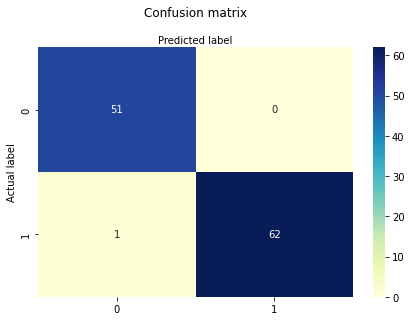

In [ ]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
X = breast.data
Y = breast.target

breast_input = pd.DataFrame(X)
breast_input.head()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

accuracy = metrics.accuracy_score(Y_test, Y_pred)*100.0
precision = metrics.precision_score(Y_test, Y_pred)*100.0
recall = metrics.recall_score(Y_test, Y_pred)*100.0
print("Accuracy: %.3f%%" % accuracy)
print("Precision: %.3f%%" % precision)
print("Recall: %.3f%%" % recall)

cnf_matrix = confusion_matrix(Y_test, Y_pred)

class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **Problem 3 Part 2**

In [ ]:
c = 0.1
clf = LogisticRegression(penalty = 'l1', C=c, solver = 'liblinear')
clf.fit(X_train, Y_train)
print("Accuracy: ", clf.score(X_test, Y_test))

Accuracy:  0.9736842105263158


# **Problem 4 Part 1**

In [ ]:
kfold = KFold(n_splits = 5,random_state=0, shuffle = True)
model = LogisticRegression(solver = 'liblinear')
results_5folds = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results_5folds.mean()*100.0, 
                                     results_5folds.std()*100.0))

kfold = KFold(n_splits = 10, random_state = 0, shuffle = True)
model = LogisticRegression(solver = 'liblinear')
results_10folds = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results_10folds.mean()*100.0, 
                                     results_10folds.std()*100.0))

print("Percent difference between 5 k-folds and standard logistic regression: %.3f%%"
 % ((results_5folds.mean()*100.0-accuracy)/accuracy))

print("Percent difference between 10 k-folds and standard logistic regression: %.3f%%"
 % ((results_10folds.mean()*100.0-accuracy)/accuracy))

Accuracy: 95.434% (2.737%)
Accuracy: 95.432% (3.858%)
Percent difference between 5 k-folds and standard logistic regression: -0.037%
Percent difference between 10 k-folds and standard logistic regression: -0.037%


# **Problem 4 Part 2**

In [ ]:
kfold = KFold(n_splits = 5,random_state=0, shuffle = True)
model = LogisticRegression(penalty = 'l1', C=c, solver = 'liblinear', 
                          max_iter=1000)
results_5folds = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results_5folds.mean()*100.0, 
                                     results_5folds.std()*100.0))

kfold = KFold(n_splits = 10, random_state = 0, shuffle = True)
model = LogisticRegression(penalty = 'l1', C=c, solver = 'liblinear',
                           max_iter=1000)
results_10folds = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results_10folds.mean()*100.0, 
                                     results_10folds.std()*100.0))

Accuracy: 92.972% (3.232%)
Accuracy: 93.669% (3.949%)
